categories
supervised machine- input, output
unsupervised- number,similar features

In [4]:
import numpy as np #array form library
import pandas as pd#store and manipulate tabular data
#visulisation libraries  ​7976731765

import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
#importing preprocesing methods for sklearn


In [15]:
confirmed_case=pd.read_csv("time_series_covid_19_confirmed.csv")

In [16]:
confirmed_case.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,853,853,853,853,854,854,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,96,113,118,130,138,140,142,148,155,166


In [10]:
#reading deaths report
deaths_reported=pd.read_csv("time_series_covid_19_deaths.csv")

In [11]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,384,405,426,446,451,471,478,491,504,546
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,34,34,35,36,36,36,36,37,38,39
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,724,732,741,751,760,767,777,788,799,811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,5,6,6,6,6,7,8


In [12]:
#reading recovered across globe report
recovered_case=pd.read_csv("time_series_covid_19_recovered.csv")

In [13]:
recovered_case.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,960,980,1001,1034,1039,1044,1055,1064,1077,1086
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,757,759,780,781,781,781,789,789,791,792
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,38,40,41,42,61,61,64,64,64,64


In [18]:
cols=confirmed_case.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20',
       '6/15/20', '6/16/20', '6/17/20', '6/18/20'],
      dtype='object', length=153)


In [19]:
confirmed=confirmed_case.loc[:,cols[4]:cols[-1]]

In [20]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,0,0,0,0,0,0,0,0,0,0,...,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
1,0,0,0,0,0,0,0,0,0,0,...,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788
2,0,0,0,0,0,0,0,0,0,0,...,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385
3,0,0,0,0,0,0,0,0,0,0,...,852,852,852,853,853,853,853,854,854,855
4,0,0,0,0,0,0,0,0,0,0,...,96,113,118,130,138,140,142,148,155,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,514,611,632,639,659,661,662,671,683,688
262,0,0,0,0,0,0,0,0,0,0,...,524,560,591,632,705,728,844,885,902,909
263,0,0,0,0,0,0,0,0,0,0,...,141,162,162,163,176,176,176,197,197,210
264,0,0,0,0,0,0,0,0,0,0,...,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279


In [21]:
recovered= recovered_case.loc[:, cols[4]:cols[-1]]

recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,0,0,0,0,0,0,0,0,0,0,...,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660
1,0,0,0,0,0,0,0,0,0,0,...,960,980,1001,1034,1039,1044,1055,1064,1077,1086
2,0,0,0,0,0,0,0,0,0,0,...,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078
3,0,0,0,0,0,0,0,0,0,0,...,757,759,780,781,781,781,789,789,791,792
4,0,0,0,0,0,0,0,0,0,0,...,38,40,41,42,61,61,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,0,0,0,0,0,0,0,0,0,...,76,135,146,156,176,177,177,182,188,191
249,0,0,0,0,0,0,0,0,0,0,...,23,23,23,28,39,53,79,91,271,273
250,0,0,0,0,0,0,0,0,0,0,...,67,97,97,97,114,114,114,127,127,129
251,0,0,0,0,0,0,0,0,0,0,...,2815,2947,3062,3158,3288,3409,3503,3624,3700,3762


In [23]:
deaths= deaths_reported.loc[:, cols[4]:cols[-1]]
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,0,0,0,0,0,0,0,0,0,0,...,384,405,426,446,451,471,478,491,504,546
1,0,0,0,0,0,0,0,0,0,0,...,34,34,35,36,36,36,36,37,38,39
2,0,0,0,0,0,0,0,0,0,0,...,724,732,741,751,760,767,777,788,799,811
3,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,52,52,52
4,0,0,0,0,0,0,0,0,0,0,...,4,4,5,5,6,6,6,6,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
262,0,0,0,0,0,0,0,0,0,0,...,127,129,136,139,160,164,208,214,244,248
263,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,3,3,5
264,0,0,0,0,0,0,0,0,0,0,...,48,48,49,49,50,50,50,50,51,51


In [24]:
dates= confirmed.keys()

dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20',
       '6/15/20', '6/16/20', '6/17/20', '6/18/20'],
      dtype='object', length=149)

In [30]:
world_cases=[]

total_deaths=[]

mortality_rate=[]

total_recovered=[]

In [31]:
for i in dates:

    confirmed_sum=confirmed[i].sum()

    print(confirmed[i])

    death_sum=deaths[i].sum()

    recovered_sum=recovered[i].sum()

    world_cases.append(confirmed_sum)

    total_deaths.append(death_sum)

    mortality_rate.append(death_sum/confirmed_sum)

    total_recovered.append(recovered_sum)
    #india.cases.append(confirmed_case[confirmed_case['Country/Region']=='India'][i.sum()])

0      0
1      0
2      0
3      0
4      0
      ..
261    0
262    0
263    0
264    0
265    0
Name: 1/22/20, Length: 266, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
261    0
262    0
263    0
264    0
265    0
Name: 1/23/20, Length: 266, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
261    0
262    0
263    0
264    0
265    0
Name: 1/24/20, Length: 266, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
261    0
262    0
263    0
264    0
265    0
Name: 1/25/20, Length: 266, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
261    0
262    0
263    0
264    0
265    0
Name: 1/26/20, Length: 266, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
261    0
262    0
263    0
264    0
265    0
Name: 1/27/20, Length: 266, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
261    0
262    0
263    0
264    0
265    0
Name: 1/28/20, Length: 266, dtype: int64
0      0
1      0
2 

In [32]:

print(confirmed_sum)

print(death_sum)

print(recovered_sum)

print(world_cases)

#print(mortality_rate)

8488976
453981
4155099
[555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19881, 23892, 27635, 30794, 34391, 37120, 40150, 42762, 44802, 45221, 60368, 66885, 69030, 71224, 73258, 75136, 75639, 76197, 76819, 78572, 78958, 79525, 80372, 81346, 82704, 84070, 85967, 88325, 90262, 92795, 95075, 97844, 101761, 105782, 109754, 113536, 118375, 125704, 130909, 145204, 156283, 167022, 181452, 196917, 216161, 243084, 272698, 304844, 337597, 378381, 418569, 468155, 530138, 594178, 661544, 720695, 783580, 858317, 933905, 1014713, 1097193, 1177447, 1251123, 1322598, 1397537, 1481490, 1567423, 1659674, 1737813, 1836615, 1906692, 1977287, 2057584, 2153578, 2242537, 2316073, 2398423, 2472264, 2546905, 2622750, 2711635, 2799064, 2884420, 2958352, 3027215, 3101078, 3176596, 3261450, 3349915, 3432050, 3511157, 3587874, 3668635, 3760836, 3851895, 3945002, 4030363, 4108270, 4184838, 4268247, 4353211, 4451126, 4548549, 4641727, 4721968, 4810315, 4906193, 5005761, 5112366, 5220585, 532102

In [39]:
#changing dates into days
v=1
day_date=[]
for i in range(len(dates)):
    v=i*1
    day_date.append(v)
day_date

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148]

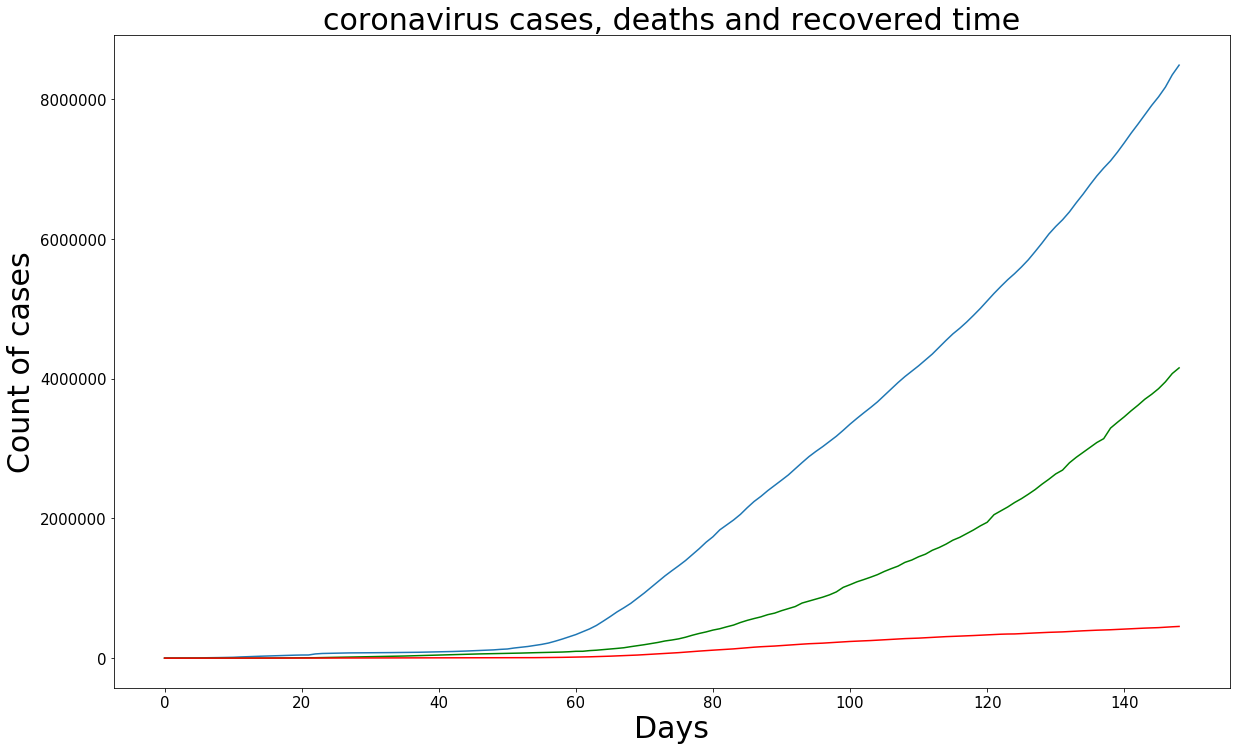

In [45]:
#plotting the cases
plt.figure(figsize=(20,12))
plt.plot(day_date,world_cases)
plt.plot(day_date,total_recovered,color='green')
plt.plot(day_date,total_deaths,color='red')
plt.title("coronavirus cases, deaths and recovered time", size=30)
plt.xlabel('Days',size=30)
plt.ylabel('Count of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [49]:
#check each day cases in world
def eachday_increase(records):
    d=[]
    for i in range(len(records)):
        if i==0:
            d.append(records[0])
        else:
            d.append(records[i]-records[i-1])
    return d

In [50]:
world_daily_increase=eachday_increase(world_cases)
world_daily_increase

[555,
 99,
 287,
 493,
 684,
 809,
 2651,
 588,
 2068,
 1693,
 2111,
 4749,
 3094,
 4011,
 3743,
 3159,
 3597,
 2729,
 3030,
 2612,
 2040,
 419,
 15147,
 6517,
 2145,
 2194,
 2034,
 1878,
 503,
 558,
 622,
 1753,
 386,
 567,
 847,
 974,
 1358,
 1366,
 1897,
 2358,
 1937,
 2533,
 2280,
 2769,
 3917,
 4021,
 3972,
 3782,
 4839,
 7329,
 5205,
 14295,
 11079,
 10739,
 14430,
 15465,
 19244,
 26923,
 29614,
 32146,
 32753,
 40784,
 40188,
 49586,
 61983,
 64040,
 67366,
 59151,
 62885,
 74737,
 75588,
 80808,
 82480,
 80254,
 73676,
 71475,
 74939,
 83953,
 85933,
 92251,
 78139,
 98802,
 70077,
 70595,
 80297,
 95994,
 88959,
 73536,
 82350,
 73841,
 74641,
 75845,
 88885,
 87429,
 85356,
 73932,
 68863,
 73863,
 75518,
 84854,
 88465,
 82135,
 79107,
 76717,
 80761,
 92201,
 91059,
 93107,
 85361,
 77907,
 76568,
 83409,
 84964,
 97915,
 97423,
 93178,
 80241,
 88347,
 95878,
 99568,
 106605,
 108219,
 100437,
 96332,
 86970,
 94892,
 102897,
 118140,
 121685,
 128946,
 107976,
 96386,
 1

In [53]:
 print(type(world_cases))

<class 'list'>


y=x+b linear regression rows*1col
x-input feature format of row and cols
y=alxl+a2x2+a3x3+b no.of rows*3 and cols
x-xtrain,xtest same with y

In [64]:
world_case=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)
days=np.array(day_date).reshape(-1,1)#convert to 2d array
print(days.shape)

(149, 1)


In [65]:
days_in_future=10
future_forcast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forcast[:-10]

In [66]:
#future_forcast
#adjusted_dates

In [67]:
x_train_confirmed,x_test_confirmed,y_train_confirmed,y_test_confirmed=train_test_split(days,world_cases,test_size=0.25,shuffle=False)

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
poly_x_train_confirmed=poly.fit_transform(x_train_confirmed)
poly_x_test_confirmed=poly.fit_transform(x_test_confirmed)
poly_future_forcast=poly.fit_transform(future_forcast)

In [88]:
model=LinearRegression()
model.fit(poly_x_train_confirmed,y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
test_pred=model.predict(poly_x_test_confirmed)#y_test_confirmed

In [90]:
predictions=model.predict(poly_future_forcast)

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [92]:
#mse
mean_squared_error(test_pred,y_test_confirmed)

1893206877945.28

In [93]:
mean_absolute_error(test_pred,y_test_confirmed)

1235045.0641934588

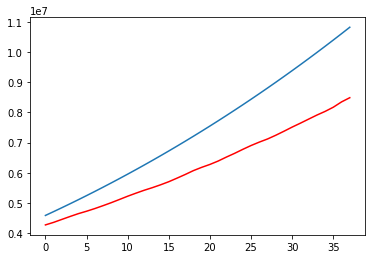

In [94]:
plt.plot(y_test_confirmed, color='red')
plt.plot(test_pred)